# Machine Learning Assignment

**Name:** Zain  
**CMS:** 405704  
**Class:** BSCS 12A  
**Topic:** Patient Dropout Prediction

## Introduction
In this assignment, I will explore the problem of patient dropout from long-term health programs. The aim is to apply machine learning techniques, particularly logistic regression, to predict dropout based on various patient activities and engagement data.

## Objectives
1. Understand the factors contributing to patient dropout.
2. Apply logistic regression for prediction.
3. Handle common machine learning challenges, including feature scaling, multicollinearity, and class imbalance.
4. Interpret the results to identify key factors influencing patient dropout.



In [853]:
!git clone https://github.com/zaineli/Patient-Dropout-Prediction

Cloning into 'Patient-Dropout-Prediction'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 7), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 4.52 MiB | 9.26 MiB/s, done.
Resolving deltas: 100% (7/7), done.


# **1. Data Exploration and Preprocessing**

In [854]:
%cd Patient-Dropout-Prediction
import pandas as pd

data = pd.read_csv('data_patient_dropout.csv')

/content/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction/Patient-Dropout-Prediction


In [855]:
data.shape

(4284, 13)

## **a. Understanding the Dataset**

In [856]:
data.head()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [857]:
data.describe()

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000




1.    For most columns, we have data for 4284 observations, except for "Number of Treatment Goals Set" and "Number of Progress Reviews Attended," where some values are missing (4275 observations).

2.   Patients tend to attend a moderate number of treatment sessions (around 14),
but some activities like confirming treatment plans (0.19) and logging in to the health portal (0.17) have much lower averages, indicating that these actions are less frequent.

3. Patients vary widely in the number of treatment sessions, goals set, and the number of treatment options explored. Features like logging into the portal have less variation, indicating more uniform behavior.

4. High Variability: Many features, like the number of treatment sessions and goals set, have high variability. This indicates that while some patients are highly engaged, others have very little interaction with their treatment plans.

5. Zero Values: Several columns (e.g., "Number of Treatment Goals Revised" and "Number of Times Logged into Health Portal") have a median and 25th percentile of 0, meaning many patients did not engage with these aspects at all.

6. Outliers: Some features have extreme maximum values (e.g., 436 treatment sessions or 256 treatment options explored), indicating the presence of outliers. These outliers may need special attention, such as capping or removal, to ensure they don't distort the analysis.





In [858]:
data.dtypes

,0
Patient ID,object
Initial Consultation Attended,object
Number of Treatment Sessions Attended,int64
Number of Treatment Goals Set,float64
Number of Treatment Goals Revised,int64
Number of Progress Reviews Attended,float64
Number of Times Treatment Plan Confirmed,int64
Number of Times Treatment Phase Initiated,int64
Number of Treatment Options Explored,int64
Number of Times Logged Into Health Portal,int64


In [859]:
data.drop('Patient ID', axis=1, inplace=True)

## **b. Handling Missing Values**

In [860]:
data.isnull().sum()

,0
Initial Consultation Attended,0
Number of Treatment Sessions Attended,0
Number of Treatment Goals Set,9
Number of Treatment Goals Revised,0
Number of Progress Reviews Attended,9
Number of Times Treatment Plan Confirmed,0
Number of Times Treatment Phase Initiated,0
Number of Treatment Options Explored,0
Number of Times Logged Into Health Portal,0
Number of Educational Resources Viewed,0


This shows us that there are 2 features that have 9 null values each.

In [861]:
data.fillna({'Number of Treatment Goals Set': data['Number of Treatment Goals Set'].mean()}, inplace=True)

In [862]:
data.fillna({'Number of Progress Reviews Attended': data['Number of Progress Reviews Attended'].median()}, inplace=True)



*   The reason why I filled null values of ('Number of Treatment Goals Set') with mean is because I felt there is some symmetry in feature indicating very less outlier.
*   The reson why I filled null values of (''Number of Progress Reviews Attended') is because I saw that there are alot of outliers in feature.



## **c. Handling Outliers**

In [863]:
import numpy as np

outliers = np.array([])
for i in data.select_dtypes(include=np.number).columns:
  z = (data[i]-data[i].mean())/data[i].std()
  outlier = np.where(z > 3)
  outliers = np.append(outliers, outlier)
  print(f'{i} has {len(outlier[0])} outliers')

Number of Treatment Sessions Attended has 53 outliers
Number of Treatment Goals Set has 33 outliers
Number of Treatment Goals Revised has 76 outliers
Number of Progress Reviews Attended has 81 outliers
Number of Times Treatment Plan Confirmed has 63 outliers
Number of Times Treatment Phase Initiated has 64 outliers
Number of Treatment Options Explored has 38 outliers
Number of Times Logged Into Health Portal has 40 outliers
Number of Educational Resources Viewed has 96 outliers
Patient Segment Type has 0 outliers
Treatment Dropped has 0 outliers


In [864]:
features = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Treatment Goals Revised',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Plan Confirmed',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Times Logged Into Health Portal',
    'Number of Educational Resources Viewed'
]

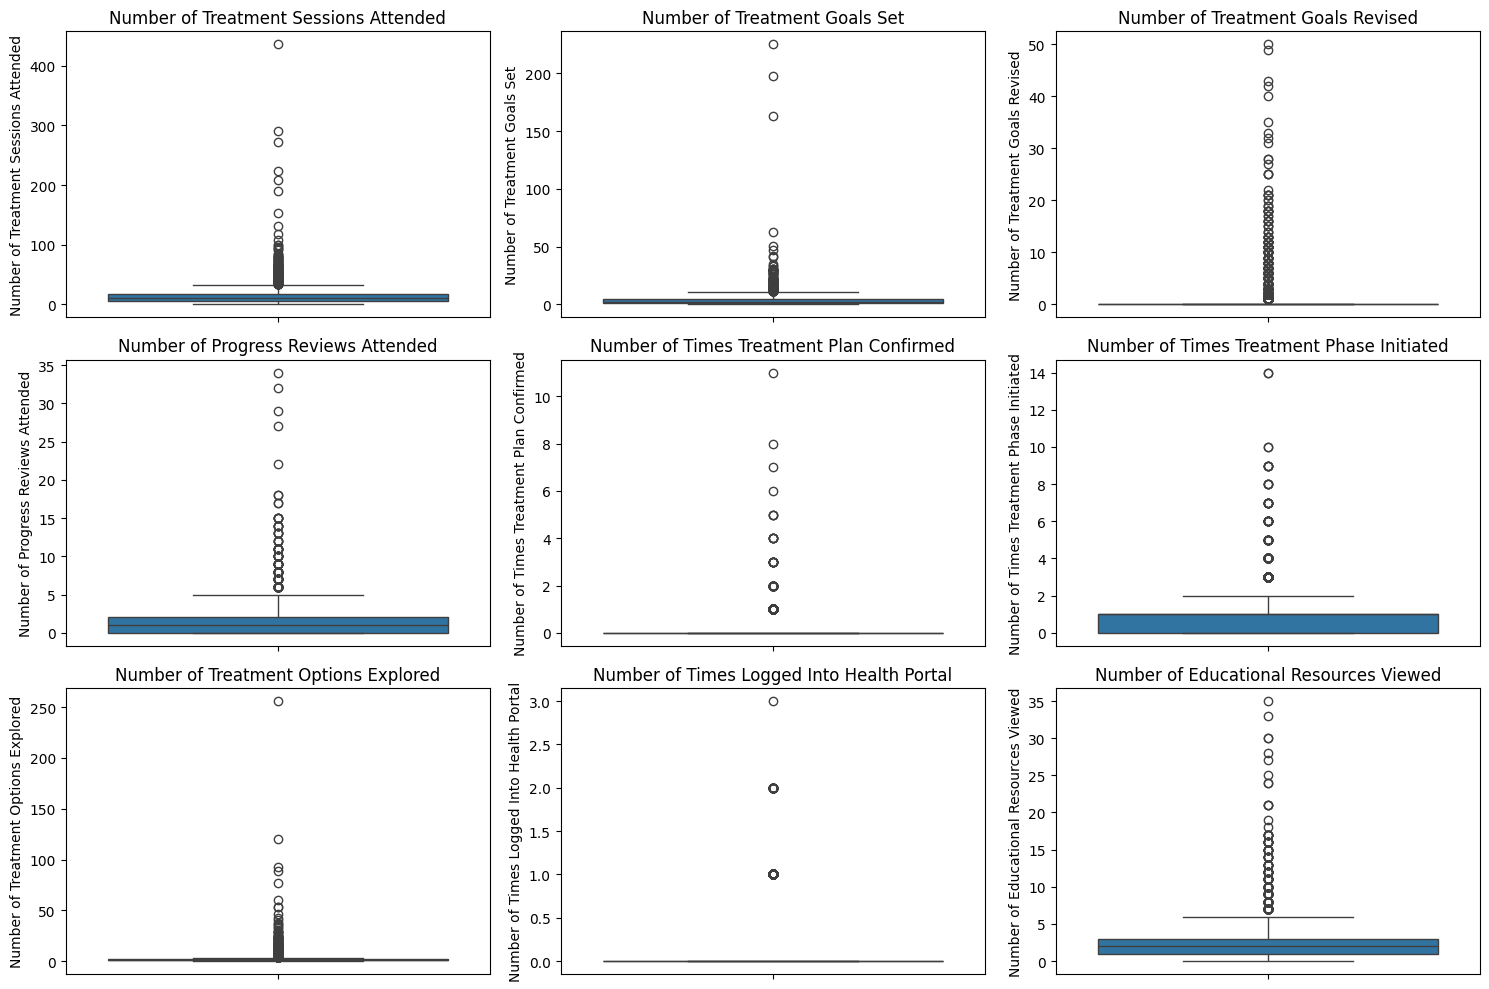

In [865]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


There are some High Outlier Counts in Educational Resources Viewed (96) and Progress Reviews Attended (81) and moderate outlier counts in Number of Treatment Sessions Attended (53), Number of Times Treatment Plan Confirmed (63), and Number of Treatment Phase Initiated (64).

In [866]:
data.shape

(4284, 12)

Checking how many feature columns contain how many zero values beacuse if they include any zero value, we cannot apply log transformation and we have to then apply log1p transformation.

In [867]:
for i in features:
  contain_zero = sum(data[i]==0)
  if contain_zero:
    print(f'{i, contain_zero} has zero values')



('Number of Treatment Sessions Attended', 1) has zero values
('Number of Treatment Goals Set', 927) has zero values
('Number of Treatment Goals Revised', 3429) has zero values
('Number of Progress Reviews Attended', 1379) has zero values
('Number of Times Treatment Plan Confirmed', 3597) has zero values
('Number of Times Treatment Phase Initiated', 1524) has zero values
('Number of Treatment Options Explored', 1007) has zero values
('Number of Times Logged Into Health Portal', 3600) has zero values
('Number of Educational Resources Viewed', 911) has zero values


Using log1p is an effective way to handle zeros. This transformation is particularly beneficial for skewed data, as it helps normalize the distribution while safely managing zero values.

In [868]:
for column in features:
    data[column] = np.log1p(data[column])

## **d. Encoding Categorical Variables**

Initial Consultation Attended can use binary encoding (0 for "No" and 1 for "Yes") or one-hot encoding.

In [869]:
data['Initial Consultation Attended'] = data['Initial Consultation Attended'].map({'Yes': 1, 'No': 0})
data['Initial Consultation Attended']

,Initial Consultation Attended
0,1
1,0
2,0
3,0
4,1
...,...
4279,1
4280,0
4281,0
4282,0


In [870]:
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data, columns=['Patient Segment Type'], drop_first=True)

## **e. Feature scaling**

Since many features have different ranges and distributions,Standardization (Z-score normalization) is recommended for features that can be normally distributed (after transformation).

In [871]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


# **2. Feature Engineering**

## **a. Creating New Features Based on Domain Knowledge**

### **Engagement Score:**

*   The number of times a patient logged into the portal, the number of sessions attended, and the number of resources viewed can be combined into one feature that reflects the overall patient engagement level.



In [872]:
data['Engagement_Score'] = (data['Number of Treatment Sessions Attended'] +
                            data['Number of Times Logged Into Health Portal'] +
                            data['Number of Educational Resources Viewed'])

### **Goal Completion Ratio:**

*  Calculate how many treatment goals were set compared to how many were revised.A higher ratio may indicate progress, whereas a lower ratio may indicate that treatment was challenging.

In [873]:
data['Goal_Completion_Ratio'] = (data['Number of Treatment Goals Set'] + 1) / (data['Number of Treatment Goals Revised'] + 1)

### **Consistency in Treatment:**

*    Patients who attended more treatment sessions or confirmed their treatment
plan multiple times could be more likely to stay engaged in the treatment program.




In [874]:
data['Treatment_Consistency'] = (data['Number of Treatment Sessions Attended'] + data['Number of Times Treatment Plan Confirmed'])


In [875]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['Number of Treatment Sessions Attended', 'Number of Treatment Goals Set',
                    'Number of Progress Reviews Attended', 'Engagement_Score', 'Goal_Completion_Ratio',
                    'Treatment_Consistency']
data[numeric_features] = scaler.fit_transform(data[numeric_features])


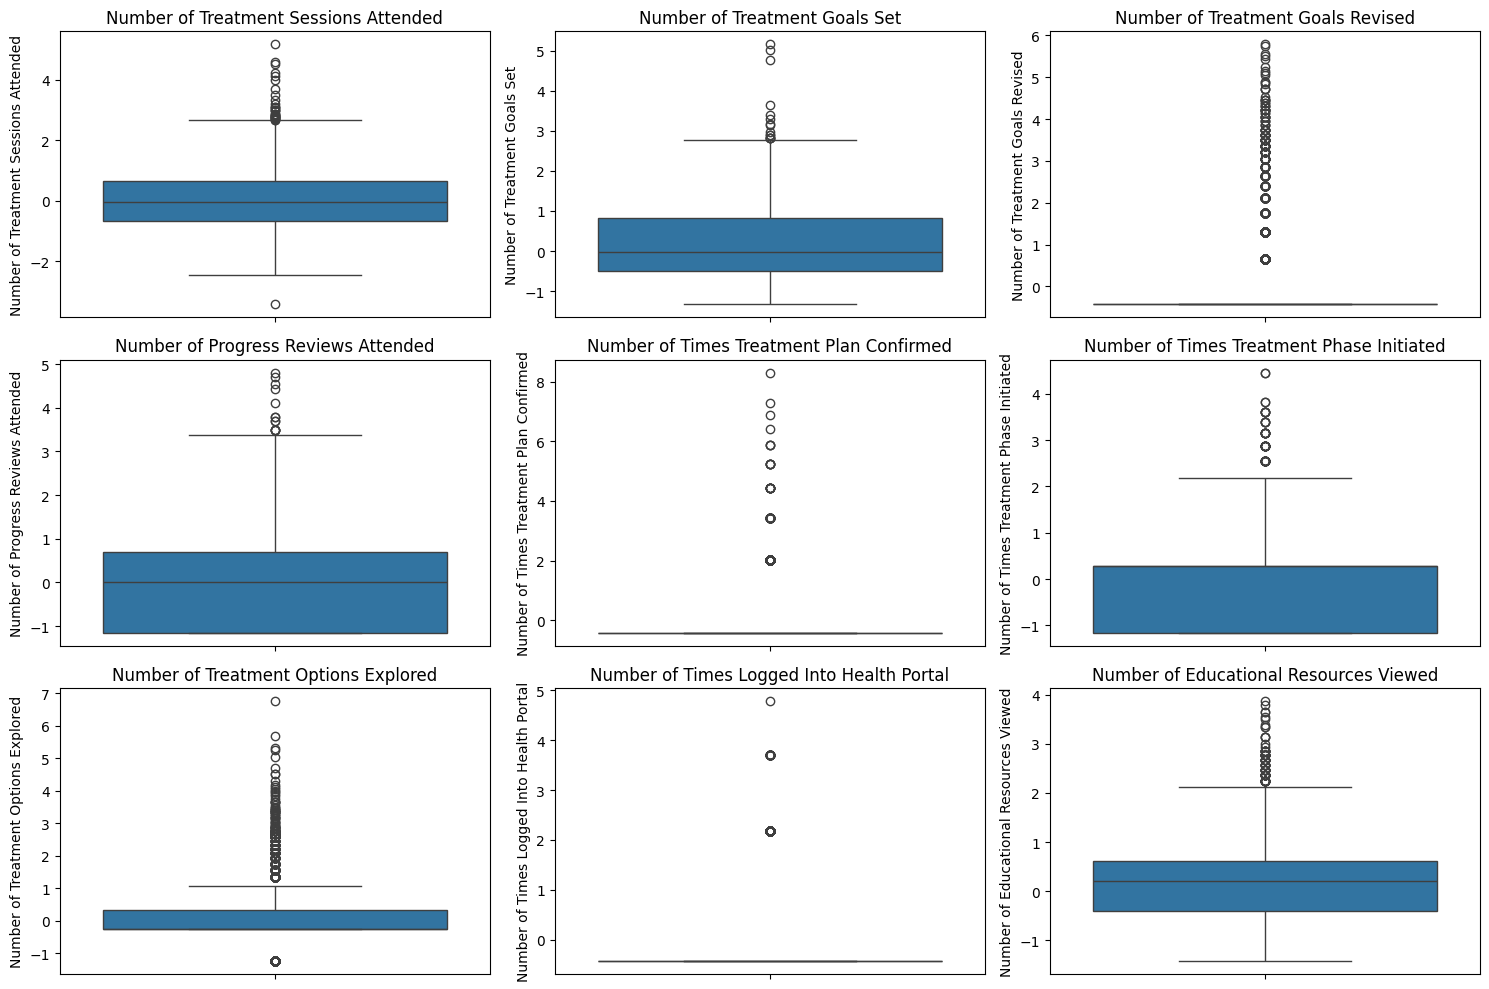

In [876]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()

## **b. Handling Nonlinear Relationships**

In [877]:
data['Log_Sessions_Attended'] = np.log1p(data['Number of Treatment Sessions Attended'] - data['Number of Treatment Sessions Attended'].min() + 1)

## **c. Creating Interaction Features**

### **Treatment Sessions × Reviews:**
How the number of sessions attended interacts with the number of progress reviews could be meaningful.

In [878]:
data['Sessions_Reviews_Interaction'] = data['Number of Treatment Sessions Attended'] * data['Number of Progress Reviews Attended']

### **Engagement × Treatment Confirmations:**
Interaction between engagement score and how often a treatment plan is confirmed.

In [879]:
data['Engagement_Confirmation_Interaction'] = data['Engagement_Score'] * data['Number of Times Treatment Plan Confirmed']

### **Outlier Detection and Handling**

*   The extreme values in some features (like Number of Times Logged Into Health Portal or Number of Treatment Goals Revised) may act as outliers



In [880]:
threshold = 3

for feature in features:
  z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
  data = data[(z_scores <= threshold)]

print(data.shape)

(3950, 19)


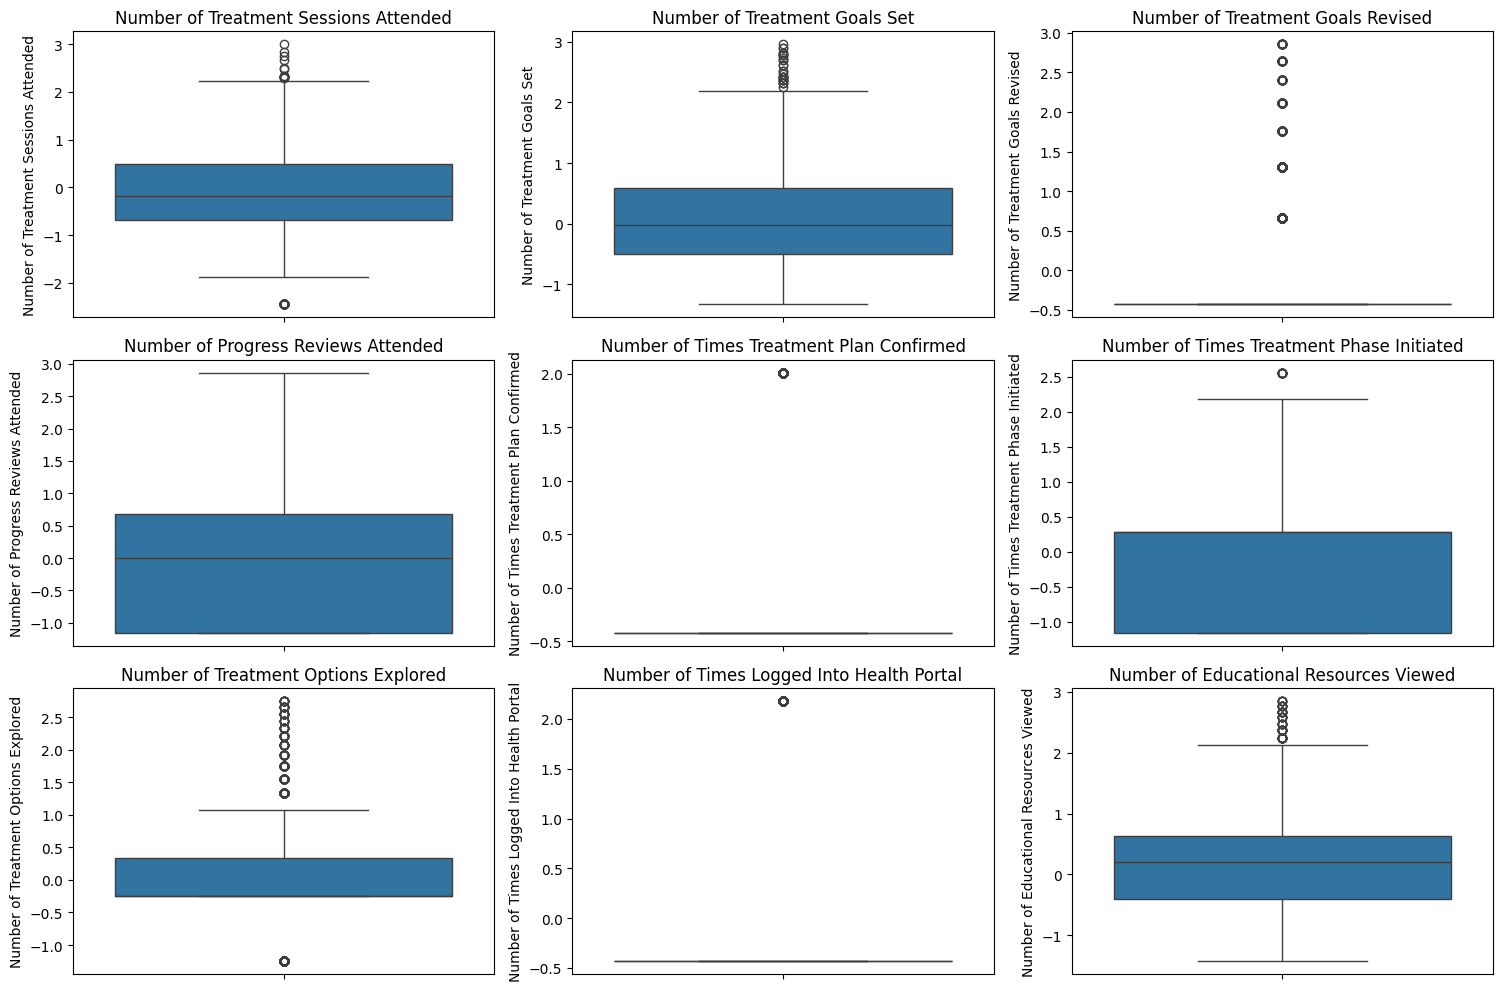

In [881]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()

# **3. Multicollinearity Handling**

## **a. Identifying Multicollinearity**

### Correlation Martix

In [882]:
data

,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Treatment Dropped,Patient Segment Type_1,Patient Segment Type_2,Engagement_Score,Goal_Completion_Ratio,Treatment_Consistency,Log_Sessions_Attended,Sessions_Reviews_Interaction,Engagement_Confirmation_Interaction
0,1,-1.152500,-0.501591,-0.433826,-1.155264,-0.420377,-1.157663,-0.248211,-0.431181,-1.425031,1,False,False,-1.403272,-0.266021,-1.003390,1.453012,1.331441,0.589904
1,0,1.752326,-1.331028,-0.433826,0.685885,-0.420377,-1.157663,0.336714,-0.431181,0.199499,1,False,False,0.709233,-1.223895,0.849694,1.971411,1.201895,-0.298145
2,0,-0.321285,0.813036,-0.433826,-1.155264,2.011638,0.278766,-0.248211,-0.431181,-1.425031,0,True,False,-1.015591,1.252173,1.078332,1.630650,0.371169,-2.043002
3,0,-0.676680,-1.331028,-0.433826,0.685885,-0.420377,-1.157663,1.073631,-0.431181,-1.425031,1,False,False,-1.181348,-1.223895,-0.699849,1.558523,-0.464125,0.496612
5,1,0.303530,0.997496,-0.433826,-1.155264,-0.420377,0.278766,-0.248211,-0.431181,1.224464,1,True,False,0.511556,1.465197,-0.074541,1.746066,-0.350657,-0.215047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1,1.065748,0.813036,2.644444,0.685885,-0.420377,-1.157663,0.751724,-0.431181,1.649862,1,False,True,1.065465,-0.516334,0.411704,1.870913,0.730981,-0.447897
4280,0,-0.487847,-0.016401,-0.433826,1.168008,-0.420377,-1.157663,-0.248211,-0.431181,-1.425031,1,False,False,-1.093276,0.294299,-0.579386,1.597493,-0.569809,0.459588
4281,0,-1.152500,-0.501591,-0.433826,0.006372,-0.420377,0.278766,-0.248211,-0.431181,-1.425031,1,False,False,-1.403272,-0.266021,-1.003390,1.453012,-0.007344,0.589904
4282,0,-0.321285,0.327846,-0.433826,0.006372,-0.420377,0.278766,-0.248211,-0.431181,0.199499,1,True,False,-0.257906,0.691853,-0.473131,1.630650,-0.002047,0.108418




> *Treatment Dropped" variable is highly correlated with several other features, particularly "Number of Times Treatment Plan Confirmed" and "Treatment Consistency.*



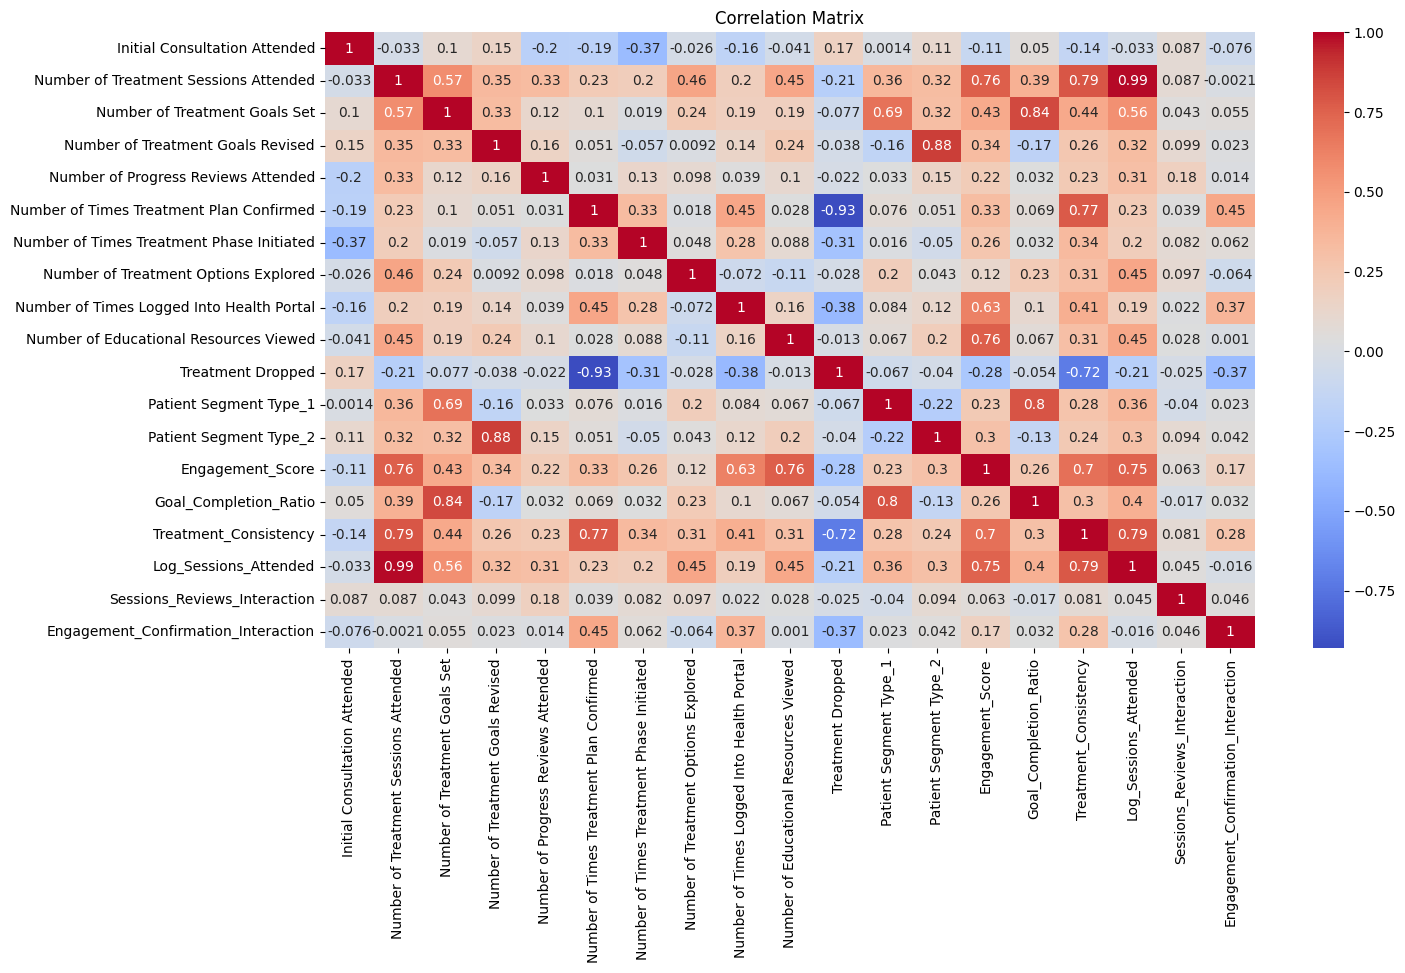

In [883]:
corr = data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Typically, a correlation coefficient above 0.8 or 0.9 indicates potential multicollinearity.
  1. Number of Treatment Sessions Attended & Log_Sessions_Attended: 0.991872
  2. Number of Treatment Goals Set & Goal_Completion_Ratio: 0.838974
  3.  Patient Segment Type_2 & Number of Treatment Goals Revised: 0.878511
  4.  Engagement_Score & Number of Educational Resources Viewed: 0.761046

## **Dropping Higly Correlated Features**

In [884]:
correlation_matrix = data.corr()
print(correlation_matrix['Number of Times Treatment Plan Confirmed'].sort_values(ascending=False))


Number of Times Treatment Plan Confirmed     1.000000
Treatment_Consistency                        0.774472
Number of Times Logged Into Health Portal    0.450885
Engagement_Confirmation_Interaction          0.448854
Number of Times Treatment Phase Initiated    0.332150
Engagement_Score                             0.325535
Number of Treatment Sessions Attended        0.230580
Log_Sessions_Attended                        0.225961
Number of Treatment Goals Set                0.101544
Patient Segment Type_1                       0.076021
Goal_Completion_Ratio                        0.068716
Number of Treatment Goals Revised            0.050740
Patient Segment Type_2                       0.050524
Sessions_Reviews_Interaction                 0.039319
Number of Progress Reviews Attended          0.030795
Number of Educational Resources Viewed       0.027513
Number of Treatment Options Explored         0.018320
Initial Consultation Attended               -0.186351
Treatment Dropped           

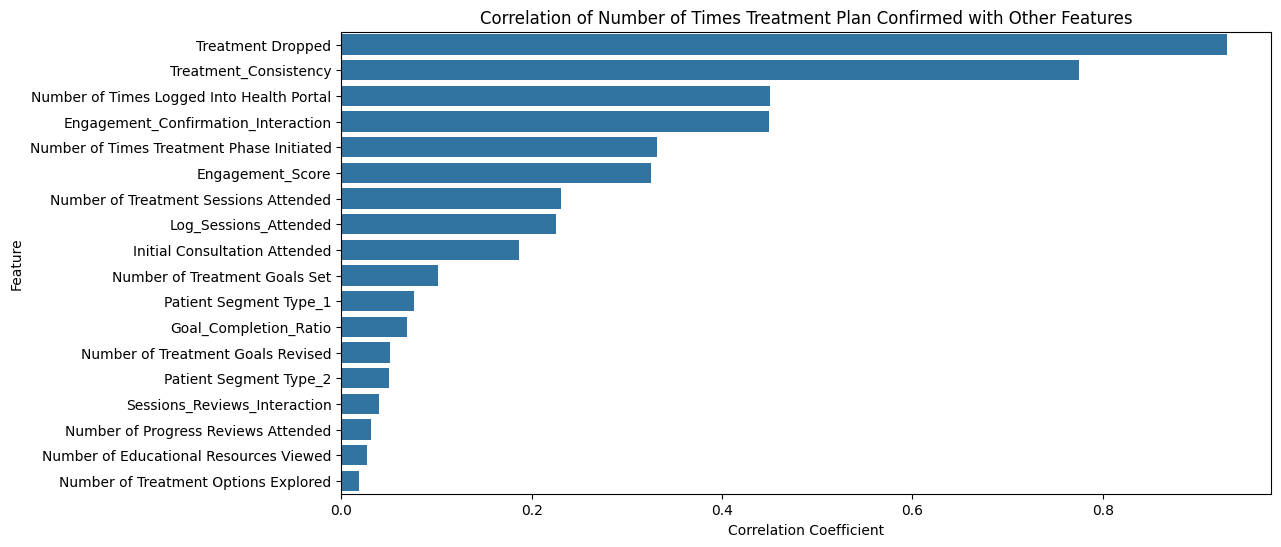

In [885]:
correlation_matrix = data.corr()
treatment_dropped_correlation = correlation_matrix['Number of Times Treatment Plan Confirmed'].drop('Number of Times Treatment Plan Confirmed')
treatment_dropped_correlation = treatment_dropped_correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=treatment_dropped_correlation.values, y=treatment_dropped_correlation.index)
plt.title('Correlation of Number of Times Treatment Plan Confirmed with Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


> *Since (Number of Times Treatment Plan Confirmed) is highly related with the treatment dropped so we have to find any feature that is correlated with (Number of Times Treatment Plan Confirmed) and by correlation matrix and graph it us (Treatment Consistency)*



In [886]:
data = data.drop(['Treatment_Consistency'], axis=1)

# **4. Model Building**

## **Splitting Data for training and Test**

In [887]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### **Prepare the data**

In [888]:
X = data.drop('Treatment Dropped', axis=1)
y = data['Treatment Dropped']

### **Split data into training and testing sets**

In [889]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Initializing Model**

In [890]:
model = LogisticRegression()



1.   Fit RFE: fit the RFE model to select the top features.
2.  Create a New Logistic Regression Model: Specify the L2 penalty for regularization.
3. Fit the Model: Train the model using the selected features.



### **Creating rfe object with top 10 relevant features**

In [891]:
rfe = RFE(estimator=model, n_features_to_select=10)

In [892]:
rfe = rfe.fit(X_train, y_train)

In [893]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Number of Treatment Sessions Attended',
       'Number of Treatment Goals Set', 'Number of Treatment Goals Revised',
       'Number of Progress Reviews Attended',
       'Number of Times Treatment Plan Confirmed',
       'Number of Times Treatment Phase Initiated',
       'Number of Times Logged Into Health Portal', 'Patient Segment Type_1',
       'Patient Segment Type_2', 'Sessions_Reviews_Interaction'],
      dtype='object')


## **Train a new model with selected features using L2 Regularization**

In [894]:
new_model = LogisticRegression(penalty='l2', solver='liblinear')
new_model.fit(X_train[selected_features], y_train)


LogisticRegression(solver='liblinear')

In [895]:
from sklearn.metrics import accuracy_score

y_pred = new_model.predict(X_test[selected_features])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9784810126582278


In [896]:
coefficients = new_model.coef_[0]
feature_names = selected_features
coefficients_dict = dict(zip(feature_names, coefficients))
print("Coefficients:")
for feature, coefficient in coefficients_dict.items():
  print(f"{feature}: {coefficient}")


Coefficients:
Number of Treatment Sessions Attended: -0.39196999232361374
Number of Treatment Goals Set: 0.32333840039043027
Number of Treatment Goals Revised: 0.03280385228925185
Number of Progress Reviews Attended: 0.14871618119515598
Number of Times Treatment Plan Confirmed: -3.6963928782568476
Number of Times Treatment Phase Initiated: -0.2896943006495151
Number of Times Logged Into Health Portal: 0.6350955467340533
Patient Segment Type_1: 0.029109988194067783
Patient Segment Type_2: -0.4364091999102581
Sessions_Reviews_Interaction: 0.29258100606463483


## **Top Features with Cofficients**

In [897]:
coefficients_df = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
coefficients_df

,Feature,Coefficient
6,Number of Times Logged Into Health Portal,0.635096
1,Number of Treatment Goals Set,0.323338
9,Sessions_Reviews_Interaction,0.292581
3,Number of Progress Reviews Attended,0.148716
2,Number of Treatment Goals Revised,0.032804
7,Patient Segment Type_1,0.029110
5,Number of Times Treatment Phase Initiated,-0.289694
0,Number of Treatment Sessions Attended,-0.391970
8,Patient Segment Type_2,-0.436409
4,Number of Times Treatment Plan Confirmed,-3.696393


## **K-Fold Cross Validation**

### **Initialize KFold**

In [898]:
from sklearn.model_selection import KFold

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []

### **Perform cross-validation**

In [899]:
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  new_model.fit(X_train[selected_features], y_train)

  y_pred = new_model.predict(X_test[selected_features])

  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

print("Accuracy scores for each fold:", accuracy_scores)
average_accuracy = np.mean(accuracy_scores)
print("Average accuracy across all folds:", average_accuracy)

Accuracy scores for each fold: [0.9784810126582278, 0.9822784810126582, 0.9873417721518988, 0.9860759493670886, 0.9810126582278481]
Average accuracy across all folds: 0.9830379746835444


# **5. Model Evaluation**

## **Evaluation Metrices**

In [900]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

y_pred = new_model.predict(X_test[selected_features])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9810126582278481
Precision: 0.9985163204747775
Recall: 0.9796215429403202
F1-score: 0.9889786921381337


## **Predicted probabilities for ROC AUC calculation**

In [901]:
y_pred_proba = new_model.predict_proba(X_test[selected_features])[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)


ROC AUC: 0.9938172156979127


## **Classification report**

In [902]:
from sklearn.metrics import classification_report

y_pred = new_model.predict(X_test[selected_features])

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       103
           1       1.00      0.98      0.99       687

    accuracy                           0.98       790
   macro avg       0.94      0.98      0.96       790
weighted avg       0.98      0.98      0.98       790



## **Plot the ROC curve**

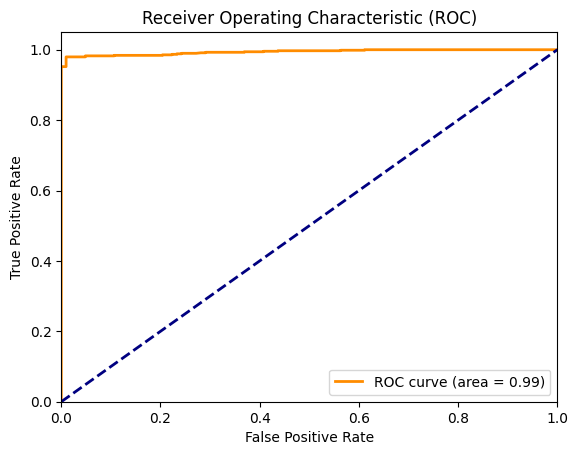

In [903]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **No Overfitting**

since the training and the test accuracy are very close to each other and checking the classification report in above cell, I think there is no overfitting.

In [904]:
train_accuracy = new_model.score(X_train[selected_features], y_train)
test_accuracy = new_model.score(X_test[selected_features], y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

if abs(train_accuracy - test_accuracy) > 0.1:
  print("Warning: Potential overfitting detected.")
  print("Training accuracy is significantly higher than testing accuracy.")
else:
  print("Model seems to be generalizing well.")

Training Accuracy: 0.9835443037974684
Testing Accuracy: 0.9810126582278481
Model seems to be generalizing well.


# **6. Discussion and Conclusion**

This assignment taught me a lot about machine learning:

####  **Data Interpretation:**
I learned how to interpret data better, looking at symmetry and how to fill in missing values in a way that makes sense, using mean for symmetrical data and median for asymmetrical data.

### **Handling Outliers:**
I discovered how to spot outliers using boxplots and learned that sometimes transforming the data can help lessen their impact on the model.

### **Feature Engineering:**
 I figured out how to create new features from existing ones and see how they relate to each other. I even explored interaction features.

### **Encoding Techniques:**
 I got a handle on one-hot encoding and when to use different encoding methods based on the features I was working with.

### **Dealing with Multicollinearity:**
I learned how to check for multicollinearity using correlation matrices and how to remove features that are too closely related to the target variable.

### **Using RFE for Feature Selection:**
I tried out Recursive Feature Elimination (RFE) to find the most important features for my model, which helped streamline my input data.

### **Regularization:**
 Applying L2 regularization (Ridge) taught me how to prevent overfitting, making sure my model works well on new data.

### **Model Validation:**
I learned about k-fold validation, which helped me confirm whether my model was overfitting or not.

### **Understanding Evaluation Metrics:**
 I gained a better understanding of evaluation metrics like accuracy and ROC, which allowed me to interpret my model’s performance more effectively.

## **Challenges Faced**

1. **Missing Values**: Figuring out how to fill in missing values was tough. I had to choose between mean and median based on whether the data was symmetrical, which took some time to analyze.

2. **Outliers**: Identifying and dealing with outliers was challenging. I had to learn how to visualize them using boxplots and calculate z-scores to decide which data points to remove.

3. **Multicollinearity**: I struggled with multicollinearity among features. Analyzing the correlation matrix to find highly related features was tricky, and deciding which ones to keep was tough.

4. **Feature Engineering**: Creating new features from existing ones required a lot of thought. It was hard to figure out which interactions might matter, and I had to test different combinations.

5. **Overfitting**: Preventing overfitting was a major concern, especially with such high accuracy. I had to learn how to use L2 regularization and k-fold validation effectively.

6. **Class Imbalance**: If there was an imbalance between dropout and non-dropout cases, it would have been challenging to ensure the model didn't favor the majority class.

7. **Understanding Metrics**: Interpreting evaluation metrics like accuracy, precision, and ROC AUC was initially confusing. I had to learn how to use these metrics in the context of my predictions.

8. **Using RFE**: Applying Recursive Feature Elimination (RFE) was complex. I had to integrate it with the logistic regression model and ensure I was picking the right features.

9. **Logistic Regression**: It took time to understand logistic regression's workings and how to apply regularization techniques to improve the model.

10. **Library Familiarity**: Learning how to navigate Python libraries like scikit-learn was a challenge. Getting used to the syntax and options required some practice.

These challenges taught me valuable lessons in data preprocessing, feature selection, and model evaluation, helping me understand the complexities of predicting patient dropout.
